In [1]:
import yfinance as yf
import  numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
ticker = ["AAPL","SPY"]
stocks = yf.download(ticker) # Stores the data from start to end 
stocks 

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
1980-12-12    0.099584         NaN    0.128348         NaN    0.128906   
1980-12-15    0.094388         NaN    0.121652         NaN    0.122210   
1980-12-16    0.087461         NaN    0.112723         NaN    0.113281   
1980-12-17    0.089625         NaN    0.115513         NaN    0.116071   
1980-12-18    0.092224         NaN    0.118862         NaN    0.119420   
...                ...         ...         ...         ...         ...   
2023-07-07  190.679993  438.549988  190.679993  438.549988  192.669998   
2023-07-10  188.610001  439.660004  188.610001  439.660004  189.990005   
2023-07-11  188.080002  442.459991  188.080002  442.459991  189.300003   
2023-07-12  189.770004  446.019989  189.770004  446.019989  191.699997   
2023-07-13  190.539993  449.559998  190.539993  449.559998  191.190002   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
1980-12-12         NaN    0.128348         NaN    0.128348         NaN   
1980-12-15         NaN    0.121652         NaN    0.122210         NaN   
1980-12-16         NaN    0.112723         NaN    0.113281         NaN   
1980-12-17         NaN    0.115513         NaN    0.115513         NaN   
1980-12-18         NaN    0.118862         NaN    0.118862         NaN   
...                ...         ...         ...         ...         ...   
2023-07-07  442.640015  190.240005  438.299988  191.410004  438.630005   
2023-07-10  439.839996  187.039993  437.589996  189.259995  438.179993   
2023-07-11  442.970001  186.600006  439.440002  189.160004  440.450012   
2023-07-12  447.480011  188.470001  444.910004  189.679993  446.390015   
2023-07-13  450.380005  189.779999  447.450012  190.500000  447.899994   

               Volume              
                 AAPL         SPY  
Date                               
1980-12-12  469033600         NaN  
1980-12-15  175884800         NaN  
1980-12-16  105728000         NaN  
1980-12-17   86441600         NaN  
1980-12-18   73449600         NaN  
...               ...         ...  
2023-07-07   46778000  86076100.0  
2023-07-10   59922200  62443500.0  
2023-07-11   46638100  64463800.0  
2023-07-12   60750200  91924500.0  
2023-07-13   41292500  72314000.0  

[10735 rows x 12 columns]

In [3]:
spy  = stocks.Close["SPY"].copy().to_frame()
spy

,SPY
Date,
1980-12-12,NaN
1980-12-15,NaN
1980-12-16,NaN
1980-12-17,NaN
1980-12-18,NaN
...,...
2023-07-07,438.549988
2023-07-10,439.660004
2023-07-11,442.459991


<function matplotlib.pyplot.show(close=None, block=None)>

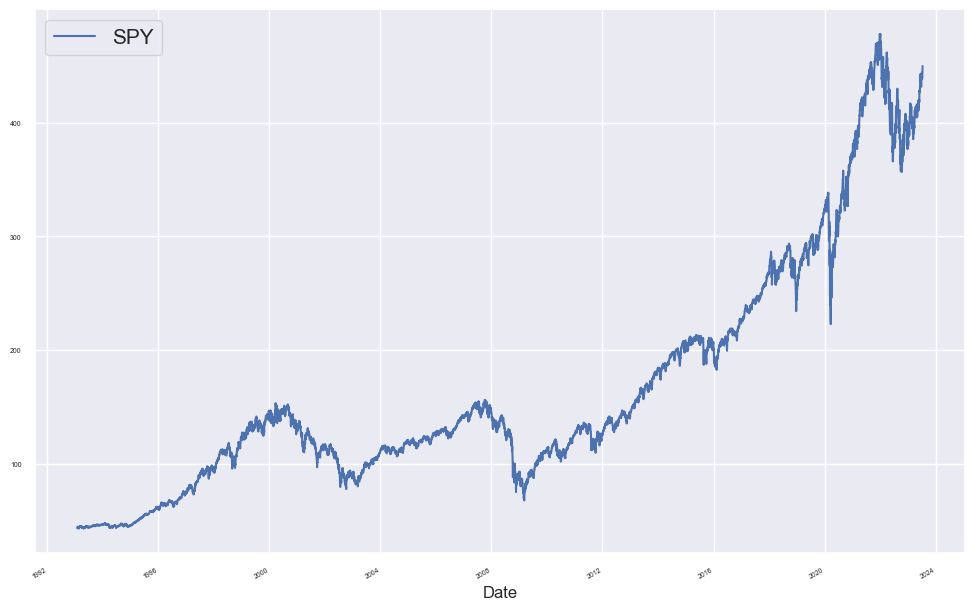

In [4]:
sns.set()
spy.plot(figsize=(12,8),fontsize=5)
plt.legend(loc="upper left",fontsize=15)
plt.show

**Calulating the moving average**

In [5]:
# using the rolling function it is a panda function (Done only on 1 column)
spy_roll = spy.rolling(window=10) # it basically stores the data in the bunch of 10 (consecutive ones )
spy_roll

Rolling [window=10,center=False,axis=0,method=single]

In [6]:
# Calculating the mean value 
spy_roll = spy_roll.mean()

In [7]:
# getting the median from a window of 10 days 
spy.rolling(window=10).max()

,SPY
Date,
1980-12-12,NaN
1980-12-15,NaN
1980-12-16,NaN
1980-12-17,NaN
1980-12-18,NaN
...,...
2023-07-07,443.790009
2023-07-10,443.790009
2023-07-11,443.790009


**Let's see if in a window of 10 I want to find the min/(any mathematical operation) from every 5 days period also**

In [8]:
spy.rolling(window=10,min_periods=5).min()

,SPY
Date,
1980-12-12,NaN
1980-12-15,NaN
1980-12-16,NaN
1980-12-17,NaN
1980-12-18,NaN
...,...
2023-07-07,431.440002
2023-07-10,431.440002
2023-07-11,436.170013


In [9]:
# SMA 
spy["SMA50"] = spy.rolling(window=50,min_periods=50).mean()

# provide Exponentially weighted function
spy["EMA50"] = spy.SPY.ewm(span=50,min_periods=50).mean()  # As there are two columns we use SPY to specify the column
spy

,SPY,SMA50,EMA50
Date,,,
1980-12-12,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN
...,...,...,...
2023-07-07,438.549988,424.2118,426.725582
2023-07-10,439.660004,424.9178,427.232815
2023-07-11,442.459991,425.5188,427.829959


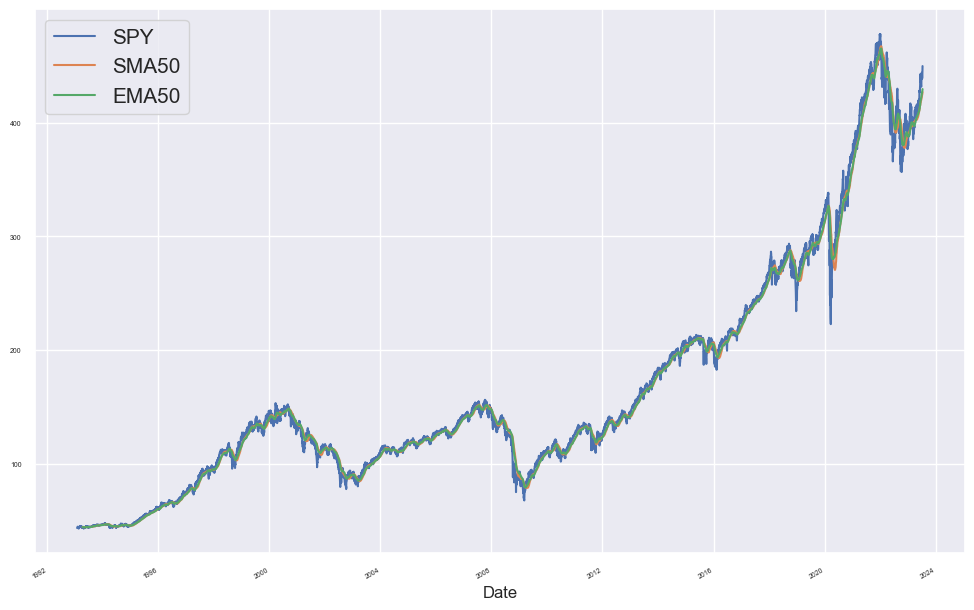

In [110]:
sns.set()
spy.plot(figsize=(12,8),fontsize=5)
plt.legend(loc="upper left",fontsize=15)
plt.show()

In [111]:
# For mentioning the day like Monday , tuesday
spy["Day"] = spy.index.day_name() 
spy

,SPY,SMA50,EMA50,Day
Date,,,,
1980-12-12,NaN,NaN,NaN,Friday
1980-12-15,NaN,NaN,NaN,Monday
1980-12-16,NaN,NaN,NaN,Tuesday
1980-12-17,NaN,NaN,NaN,Wednesday
1980-12-18,NaN,NaN,NaN,Thursday
...,...,...,...,...
2023-07-07,438.549988,424.2118,426.725582,Friday
2023-07-10,439.660004,424.9178,427.232815,Monday
2023-07-11,442.459991,425.5188,427.829959,Tuesday


In [112]:
spy["Quarters"] = spy.index.quarter
spy

,SPY,SMA50,EMA50,Day,Quarters
Date,,,,,
1980-12-12,NaN,NaN,NaN,Friday,4
1980-12-15,NaN,NaN,NaN,Monday,4
1980-12-16,NaN,NaN,NaN,Tuesday,4
1980-12-17,NaN,NaN,NaN,Wednesday,4
1980-12-18,NaN,NaN,NaN,Thursday,4
...,...,...,...,...,...
2023-07-07,438.549988,424.2118,426.725582,Friday,3
2023-07-10,439.660004,424.9178,427.232815,Monday,3
2023-07-11,442.459991,425.5188,427.829959,Tuesday,3


# adding the missing days (saturday and sunday ) 

In [113]:
spy2 = stocks.Close.SPY.to_frame()
spy2

,SPY
Date,
1980-12-12,NaN
1980-12-15,NaN
1980-12-16,NaN
1980-12-17,NaN
1980-12-18,NaN
...,...
2023-07-07,438.549988
2023-07-10,439.660004
2023-07-11,442.459991


In [115]:
# including all the days 
all_days  = pd.date_range(start="1980-12-12	",end="2023-07-13",freq='D')
all_days

DatetimeIndex(['1980-12-12', '1980-12-13', '1980-12-14', '1980-12-15',
               '1980-12-16', '1980-12-17', '1980-12-18', '1980-12-19',
               '1980-12-20', '1980-12-21',
               ...
               '2023-07-04', '2023-07-05', '2023-07-06', '2023-07-07',
               '2023-07-08', '2023-07-09', '2023-07-10', '2023-07-11',
               '2023-07-12', '2023-07-13'],
              dtype='datetime64[ns]', length=15554, freq='D')

In [117]:
spy2 = spy2.reindex(all_days)
spy2

,SPY
1980-12-12,NaN
1980-12-13,NaN
1980-12-14,NaN
1980-12-15,NaN
1980-12-16,NaN
...,...
2023-07-09,NaN
2023-07-10,439.660004
2023-07-11,442.459991
2023-07-12,446.019989


In [120]:
# To fill the NaN use Forward fill and Backward fill

# Forward fill take the previous value befor Nan and copy it 
spy2.fillna(method="ffill") 

# Backward fill Take the future value and copy it in previous NaN
spy2.fillna(method="bfill")

,SPY
1980-12-12,43.937500
1980-12-13,43.937500
1980-12-14,43.937500
1980-12-15,43.937500
1980-12-16,43.937500
...,...
2023-07-09,439.660004
2023-07-10,439.660004
2023-07-11,442.459991
2023-07-12,446.019989
